In [1]:
from helpers import *

# Neural Network Architecture
class RGBtoHSVNet(nn.Module):
    def __init__(self):
        super(RGBtoHSVNet, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 3)
        
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [2]:
extra_rgb = generate_rgb_samples(1000,radius=0.4, invert_mask=False)
extra_hsv = rgb_to_hsv(extra_rgb)

# Plot the colors in 3D space
#plot_colors_3d(extra_rgb, extra_rgb, title="RGB Extrapolation Colors in 3D Space")
#plot_colors_3d(extra_hsv, extra_rgb, title="HSV Extrapolation Colors in 3D Space")

# Initialize model
extra_model = RGBtoHSVNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(extra_model.parameters(), lr=0.001)

# print("Model architecture:")
# print(model)

training_losses, trained_model = train_model(extra_model, extra_rgb, extra_hsv, num_epochs=100, verbose=True)


Epoch [20/100], Loss: 0.010849
Epoch [40/100], Loss: 0.007831
Epoch [60/100], Loss: 0.005793
Epoch [80/100], Loss: 0.004866
Epoch [100/100], Loss: 0.003736
Training completed!


In [3]:
inter_rgb = generate_rgb_samples(1000,radius=0.4, invert_mask=True)
inter_hsv = rgb_to_hsv(inter_rgb)

# Plot the colors in 3D space
#plot_colors_3d(inter_rgb, inter_rgb, title="RGB Interpolation Colors in 3D Space")
#plot_colors_3d(inter_hsv, inter_rgb, title="HSV Interpolation Colors in 3D Space")

# Initialize model
inter_model = RGBtoHSVNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(inter_model.parameters(), lr=0.001)

# print("Model architecture:")
# print(model)

training_losses, trained_model = train_model(inter_model, inter_rgb, inter_hsv, num_epochs=100, verbose=True)

Epoch [20/100], Loss: 0.008696
Epoch [40/100], Loss: 0.004962
Epoch [60/100], Loss: 0.003384
Epoch [80/100], Loss: 0.002564
Epoch [100/100], Loss: 0.001967
Training completed!


In [4]:
random_rgb = generate_rgb_samples(1000)
random_hsv = rgb_to_hsv(random_rgb)

# Plot the colors in 3D space
#plot_colors_3d(random_rgb, random_rgb, title="RGB Random Colors in 3D Space")
#plot_colors_3d(random_hsv, random_rgb, title="HSV Random Colors in 3D Space")

# Initialize model
random_model = RGBtoHSVNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(random_model.parameters(), lr=0.001)

# print("Model architecture:")
# print(model)

training_losses, trained_model = train_model(random_model, random_rgb, random_hsv, num_epochs=100, verbose=True)

Epoch [20/100], Loss: 0.008638
Epoch [40/100], Loss: 0.005002
Epoch [60/100], Loss: 0.003328
Epoch [80/100], Loss: 0.002490
Epoch [100/100], Loss: 0.001918
Training completed!


In [5]:
rgb_middle = np.array([[0.5, 0.5, 0.5]])  # Red in RGB
hsv_middle = rgb_to_hsv(rgb_middle)

rgb_red = np.array([[1, 0, 0]])  # Red in RGB
hsv_red = rgb_to_hsv(rgb_red)

In [6]:
hsv_middle_predict = predict_hsv(extra_model, rgb_middle)
middle_activation = capture_activations(extra_model, rgb_middle)

hsv_red_predict = predict_hsv(random_model, rgb_red)
red_activation = capture_activations(random_model, rgb_red)

## Extrapolation Model

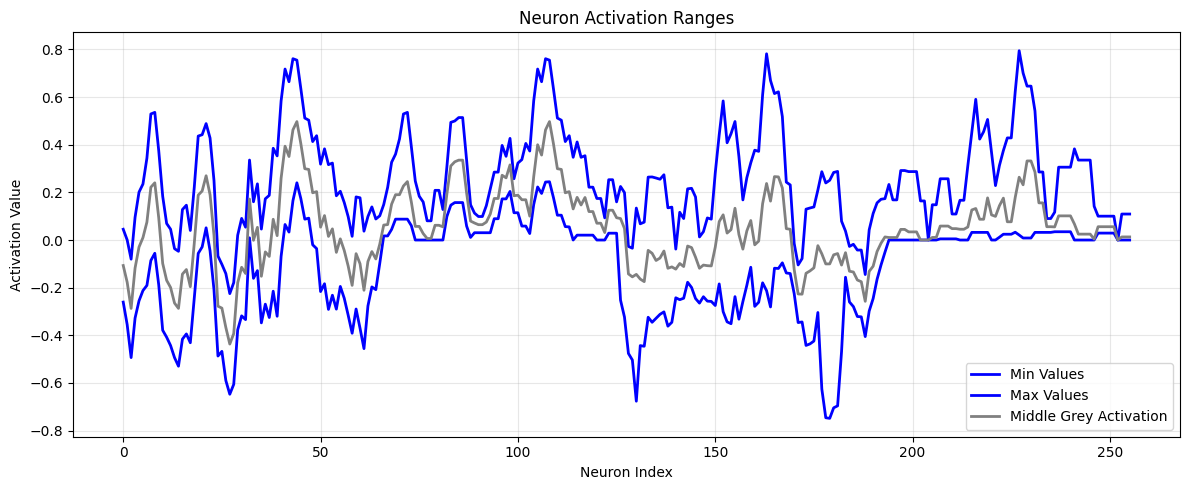

In [7]:
extra_activations = capture_activations(extra_model, extra_rgb)
# get the min and max values of the activations
min_extra_values = np.min(extra_activations, axis=0)
max_extra_values = np.max(extra_activations, axis=0)


rgb_middle = np.array([[0.5, 0.5, 0.5]])  # Red in RGB
hsv_middle = rgb_to_hsv(rgb_middle)

hsv_middle_predict = predict_hsv(extra_model, rgb_middle)
middle_activation = capture_activations(extra_model, rgb_middle)

hsv_red_predict = predict_hsv(extra_model, rgb_red)
red_activation = capture_activations(extra_model, rgb_red)

# Plot min/max values
plot_line_graphs([min_extra_values, max_extra_values, middle_activation[0]], 
                colors=['blue', 'blue', 'gray'], 
                labels=['Min Values', 'Max Values', 'Middle Grey Activation', 'Red Activation'],
                title='Neuron Activation Ranges',
                smooth=True, smooth_window=5)

In [8]:
check_activation_bounds(middle_activation[0], min_extra_values, max_extra_values)

{'within_bounds': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tr

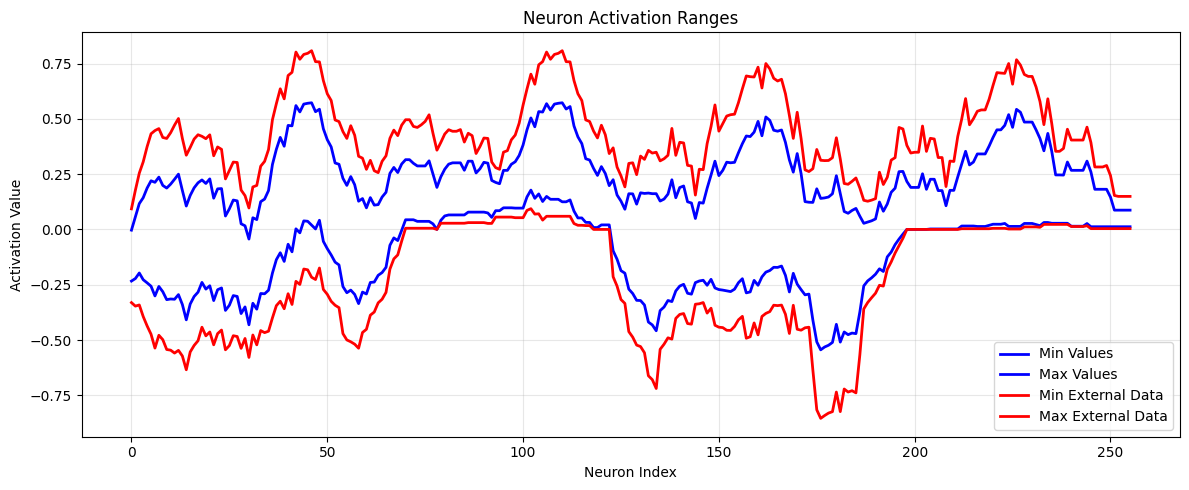

In [9]:
extra_activations_invert = capture_activations(extra_model, inter_rgb)
# get the min and max values of the activations
min_invert_values = np.min(extra_activations_invert, axis=0)
max_invert_values = np.max(extra_activations_invert, axis=0)

# Plot min/max values
plot_line_graphs([min_extra_values, max_extra_values, min_invert_values, max_invert_values], 
                colors=['blue', 'blue', 'red', 'red'], 
                labels=['Min Values', 'Max Values', 'Min External Data', 'Max External Data'],
                title='Neuron Activation Ranges',
                smooth=True, smooth_window=12)

## Interpolation Model

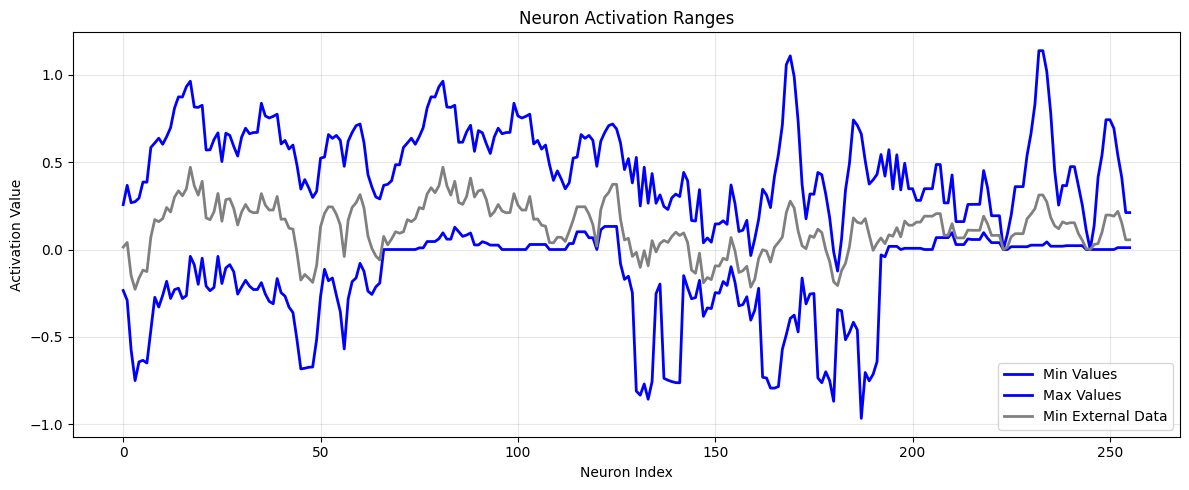

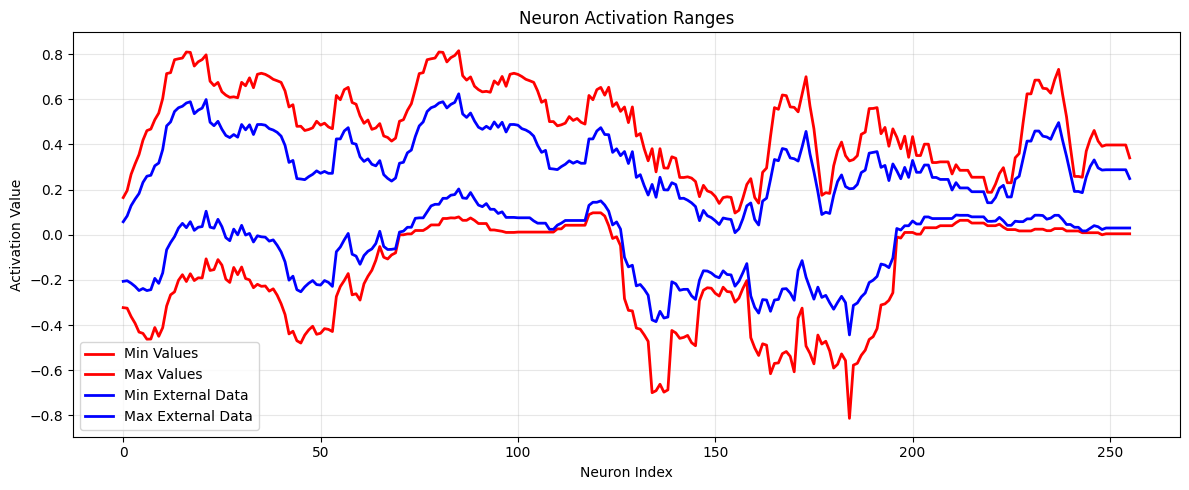

In [10]:
inter_activations = capture_activations(inter_model, inter_rgb)
# get the min and max values of the activations
min_inter_values = np.min(inter_activations, axis=0)
max_inter_values = np.max(inter_activations, axis=0)

inter_invert_activations = capture_activations(inter_model, extra_rgb)
# get the min and max values of the activations
min_inter_values_invert = np.min(inter_invert_activations, axis=0)
max_inter_values_invert = np.max(inter_invert_activations, axis=0)

hsv_middle_predict = predict_hsv(inter_model, rgb_middle)
middle_activation = capture_activations(inter_model, rgb_middle)

# Plot min/max values
plot_line_graphs([min_inter_values, max_inter_values, middle_activation[0]], 
                colors=['blue', 'blue', 'grey', 'red'], 
                labels=['Min Values', 'Max Values', 'Min External Data', 'Max External Data'],
                title='Neuron Activation Ranges',
                smooth=True, smooth_window=5)

# Plot min/max values
plot_line_graphs([min_inter_values, max_inter_values, min_inter_values_invert, max_inter_values_invert], 
                colors=['red', 'red', 'blue', 'blue'], 
                labels=['Min Values', 'Max Values', 'Min External Data', 'Max External Data'],
                title='Neuron Activation Ranges',
                smooth=True, smooth_window=12)

In [11]:
check_activation_bounds(middle_activation[0], min_inter_values, max_inter_values)

{'within_bounds': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tr

## Random Model

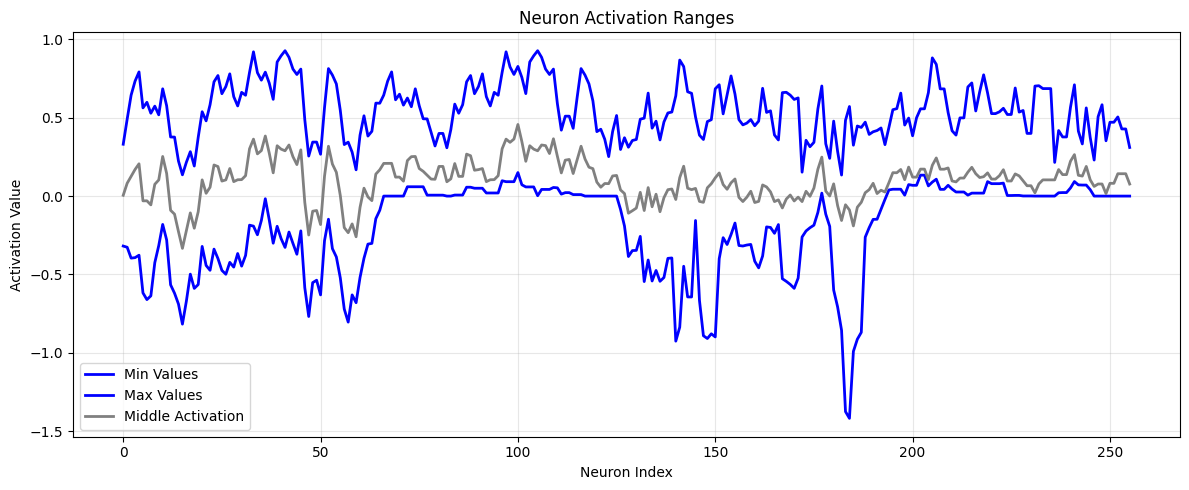

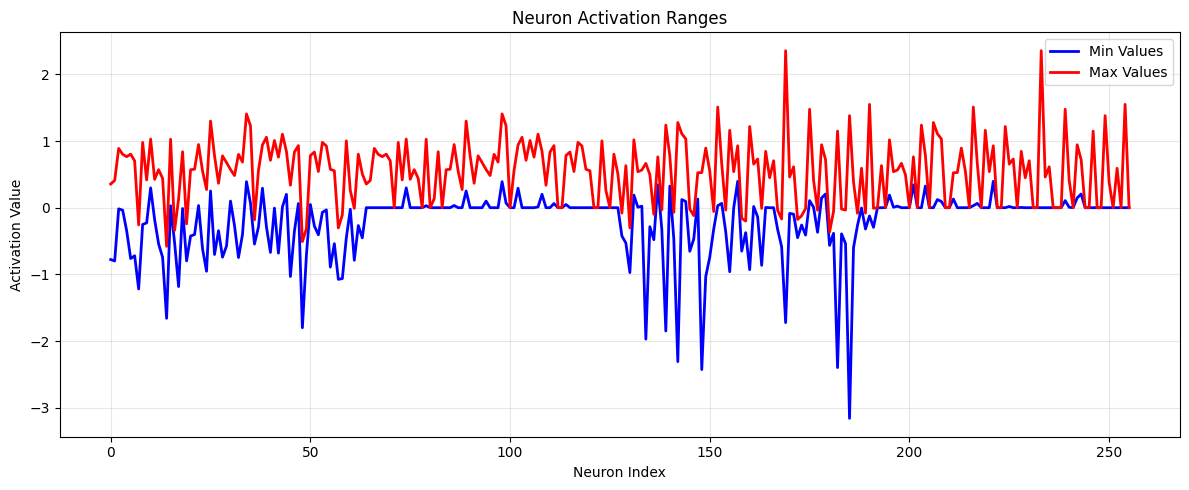

In [12]:
random_activations = capture_activations(random_model, random_rgb)
# get the min and max values of the activations
min_random_values = np.min(random_activations, axis=0)
max_random_values = np.max(random_activations, axis=0)

hsv_red_predict = predict_hsv(random_model, rgb_red)
red_activation = capture_activations(random_model, rgb_red)

hsv_middle_predict = predict_hsv(random_model, rgb_middle)
middle_activation = capture_activations(random_model, rgb_middle)

# Plot min/max values
plot_line_graphs([min_random_values, max_random_values, middle_activation[0]], 
                colors=['blue', 'blue', 'grey'], 
                labels=['Min Values', 'Max Values', 'Middle Activation', 'Red Activation'],
                title='Neuron Activation Ranges',
                smooth=True, smooth_window=5)

# Plot min/max values
plot_line_graphs([min_random_values, max_random_values], 
                colors=['blue', 'Red'], 
                labels=['Min Values', 'Max Values'],
                title='Neuron Activation Ranges',
                smooth=False, smooth_window=15)

In [13]:
check_activation_bounds(middle_activation[0], min_random_values, max_random_values)

{'within_bounds': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tr

In [14]:
check_activation_bounds(red_activation[0], min_inter_values, max_inter_values)

{'within_bounds': array([ True, False, False, False, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,
         True, False, False,  True, False, False, False,  True, False,
        False, False,  True,  True,  True, False,  True, False,  True,
         True,  True,  True,  True,  True, False,  True,  True, False,
         True, False, False, False,  True,  True,  True,  True, False,
        False,  True, False,  True,  True, False, False, False,  True,
        False,  True, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True, False,  True,  True, False,  True, False,  True,
        False, False, False,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True, False,  True,  True,
        False,  True, False, False,  True,  True,  True,  True,  True,
        False, False,  True, False,  True,  True, False, Fal

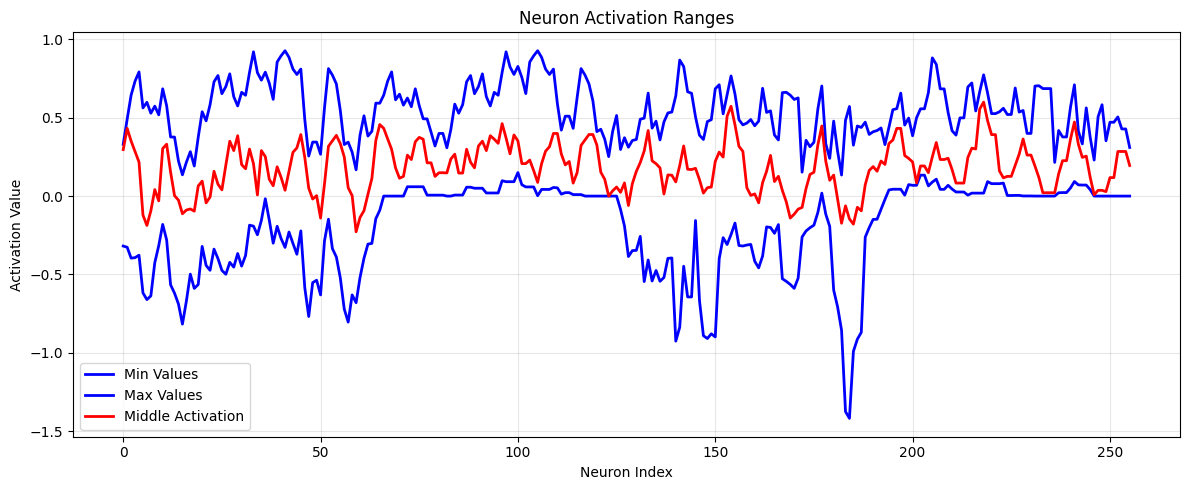

In [15]:
plot_line_graphs([min_random_values, max_random_values, red_activation[0]], 
                colors=['blue', 'blue', 'red'], 
                labels=['Min Values', 'Max Values', 'Middle Activation', 'Red Activation'],
                title='Neuron Activation Ranges',
                smooth=True, smooth_window=5)

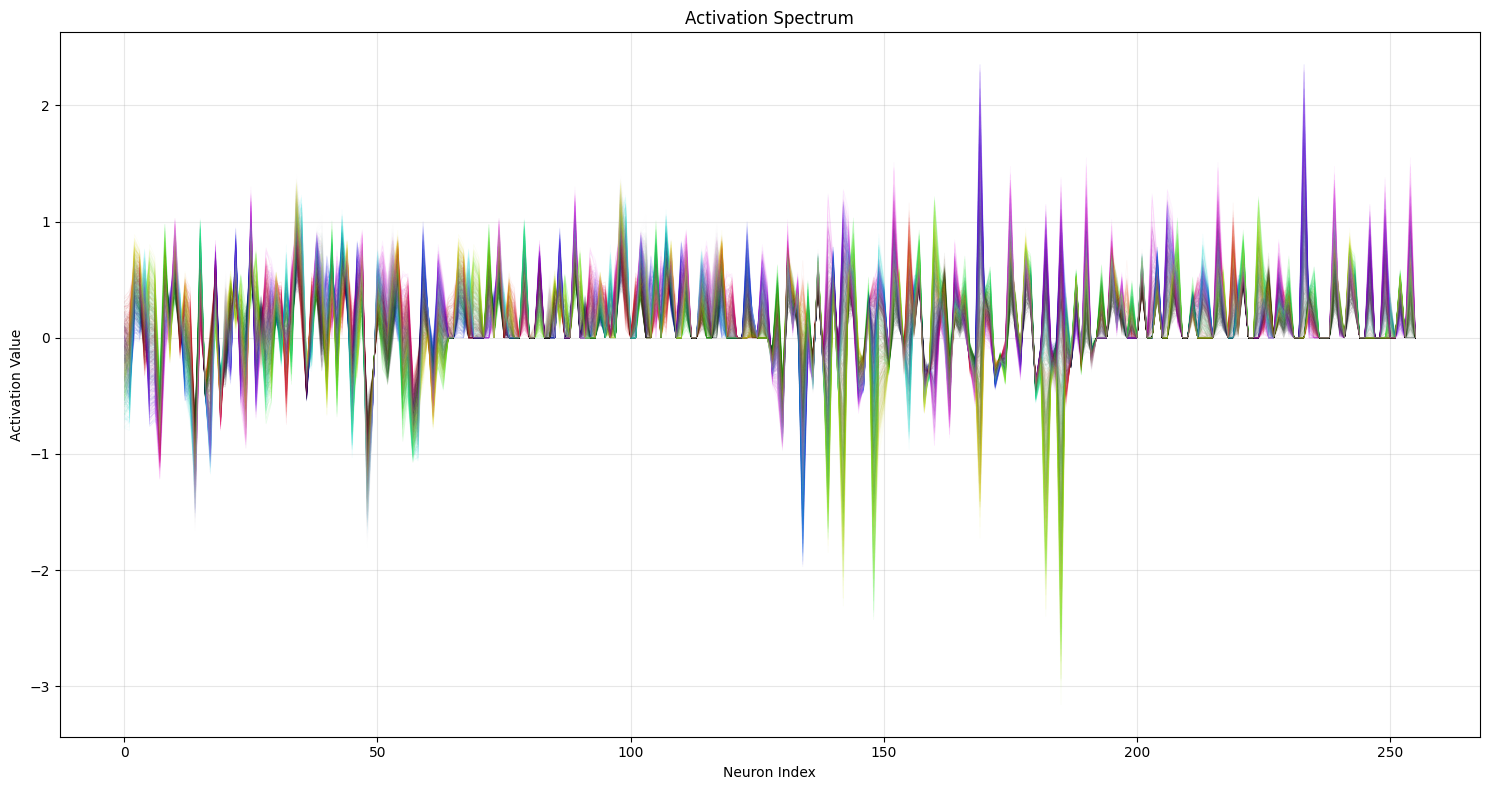

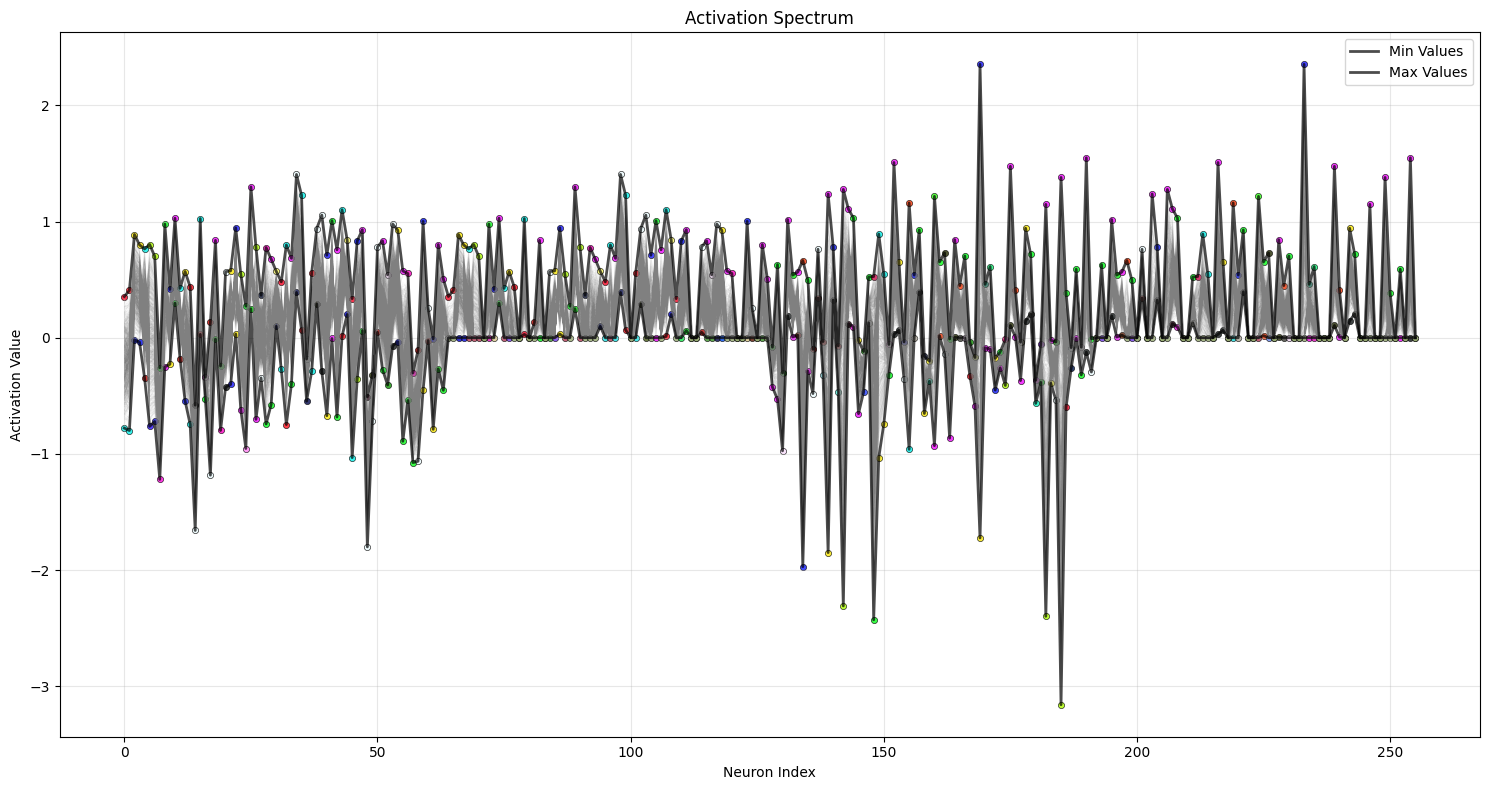

In [16]:
# Random spectrum (default)
plot_activation_spectrum(random_activations, random_rgb, colored_spectrum=True, alpha=0.05, show_minmax=False )
plot_activation_spectrum(random_activations, random_rgb, colored_spectrum=False, alpha=0.05, show_minmax=True )

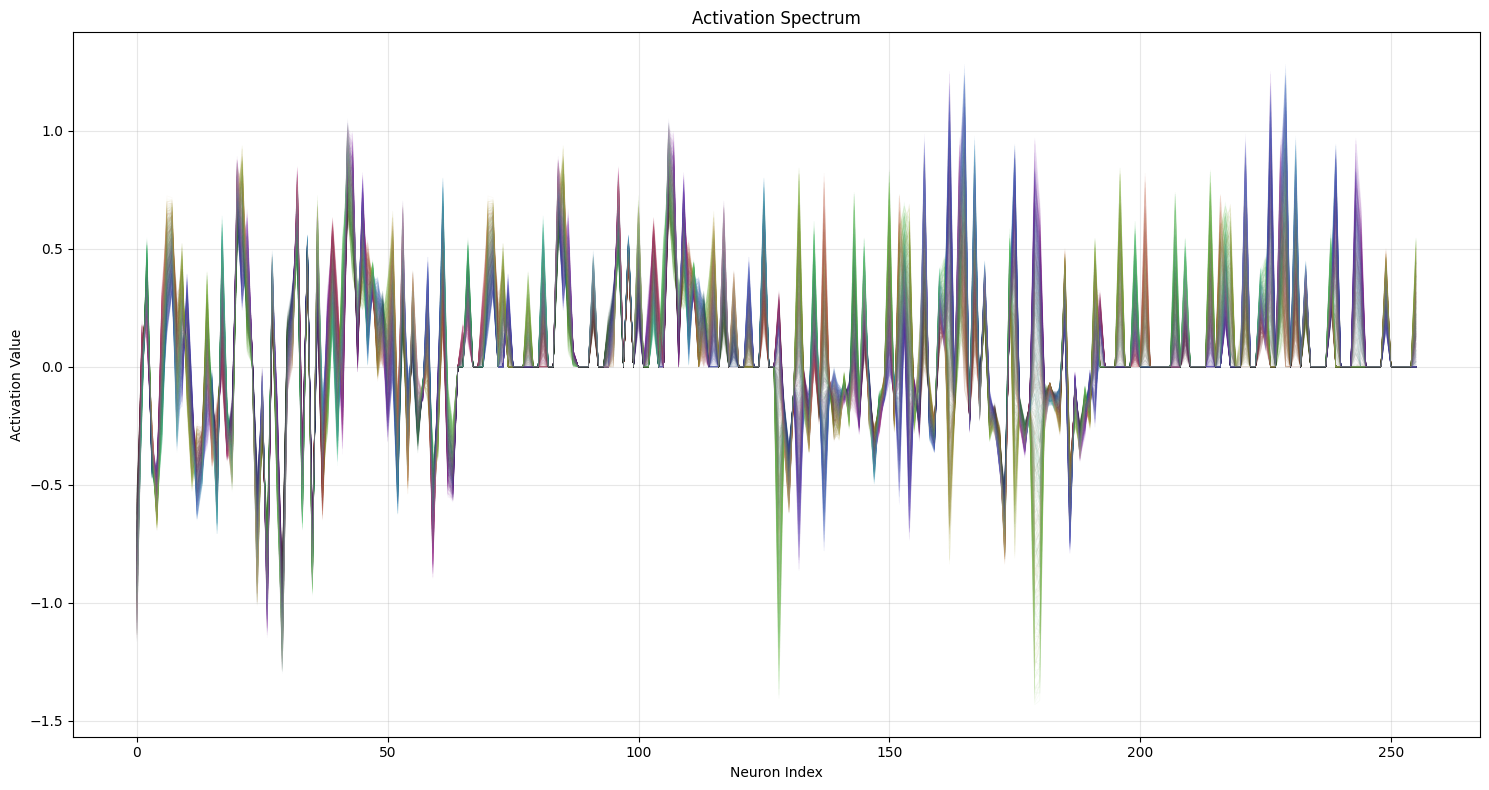

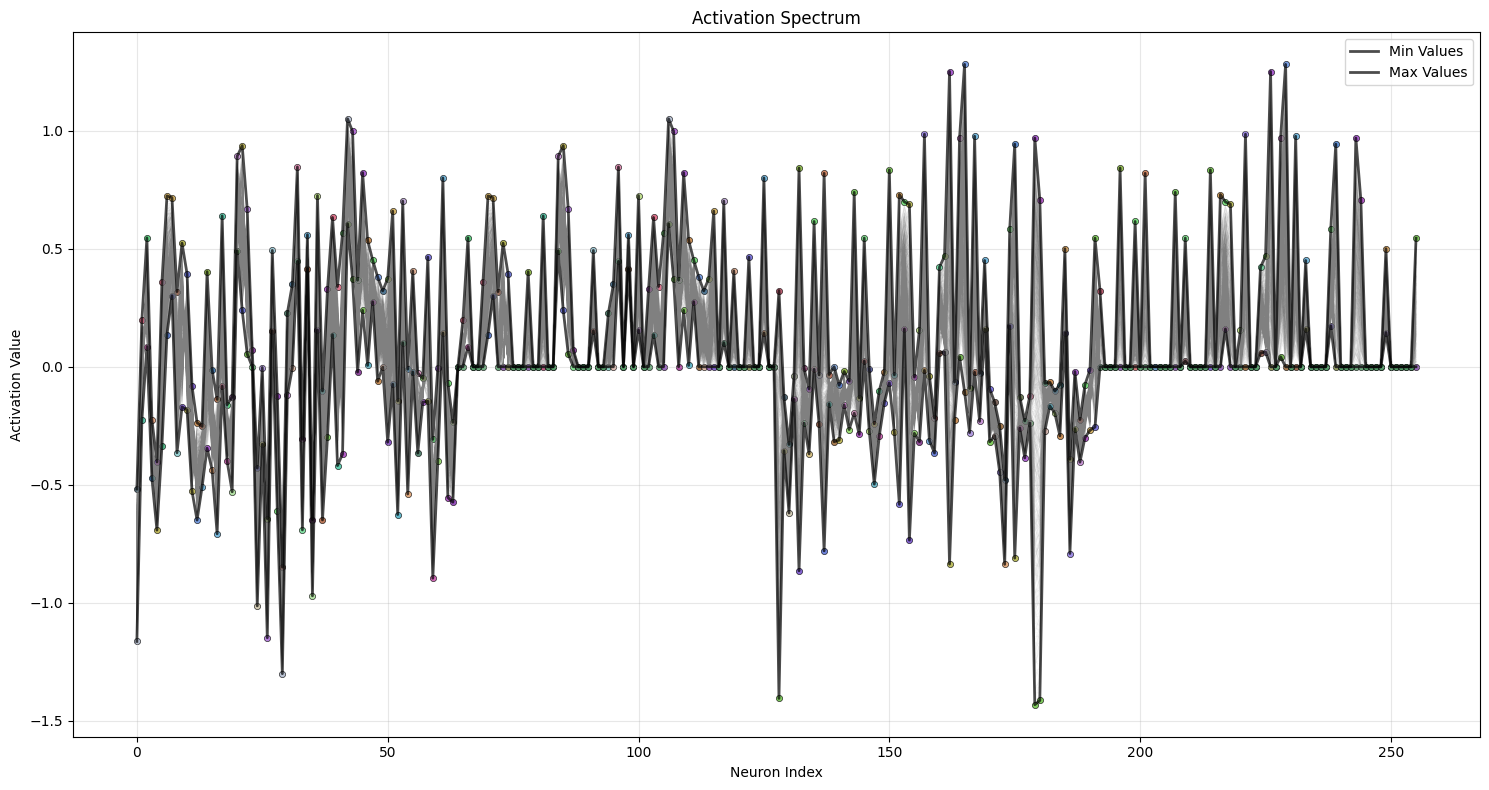

In [17]:
plot_activation_spectrum(extra_activations, extra_rgb, colored_spectrum=True, alpha=0.05, show_minmax=False )
plot_activation_spectrum(extra_activations, extra_rgb, colored_spectrum=False, alpha=0.05, show_minmax=True )

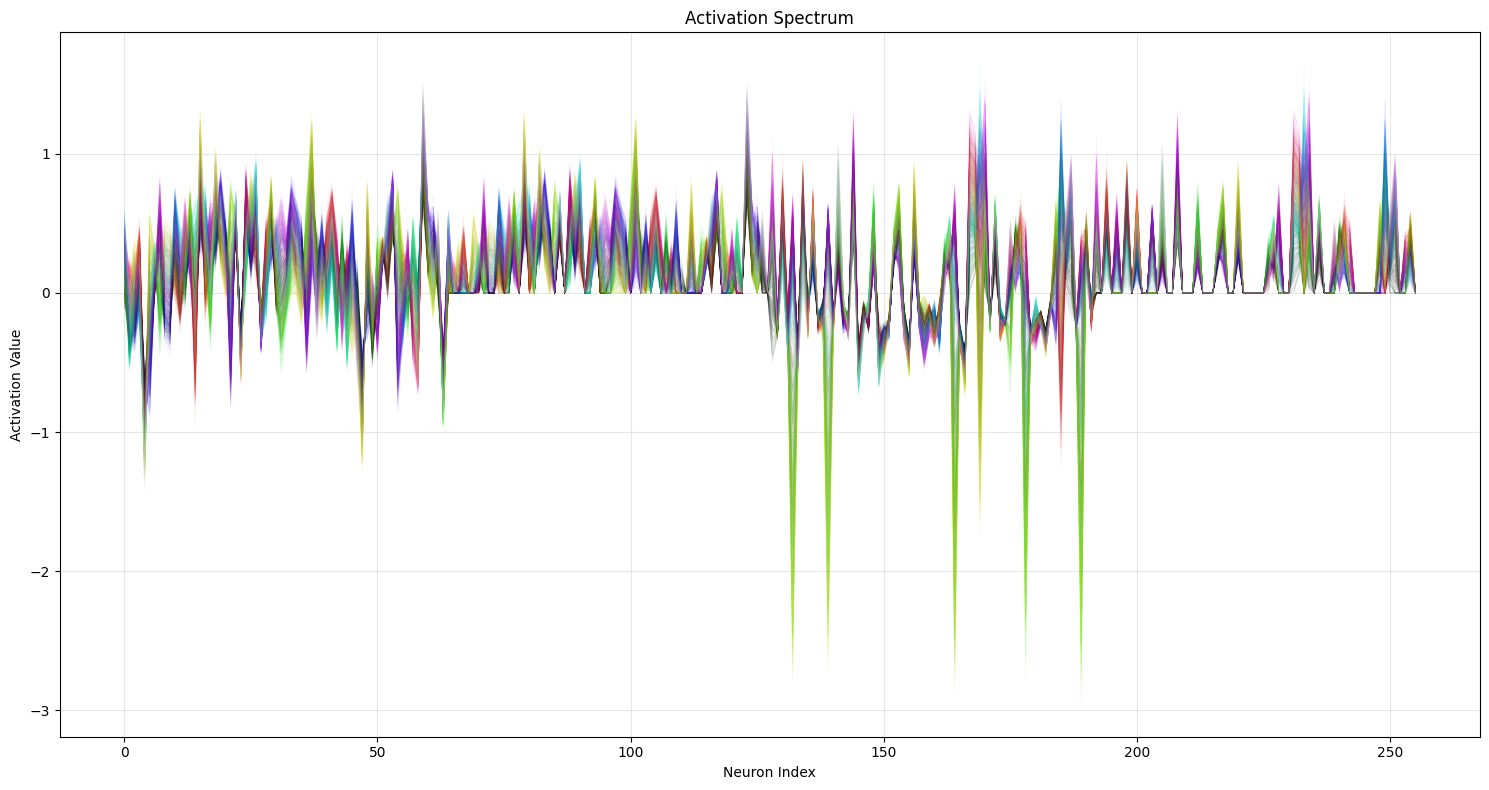

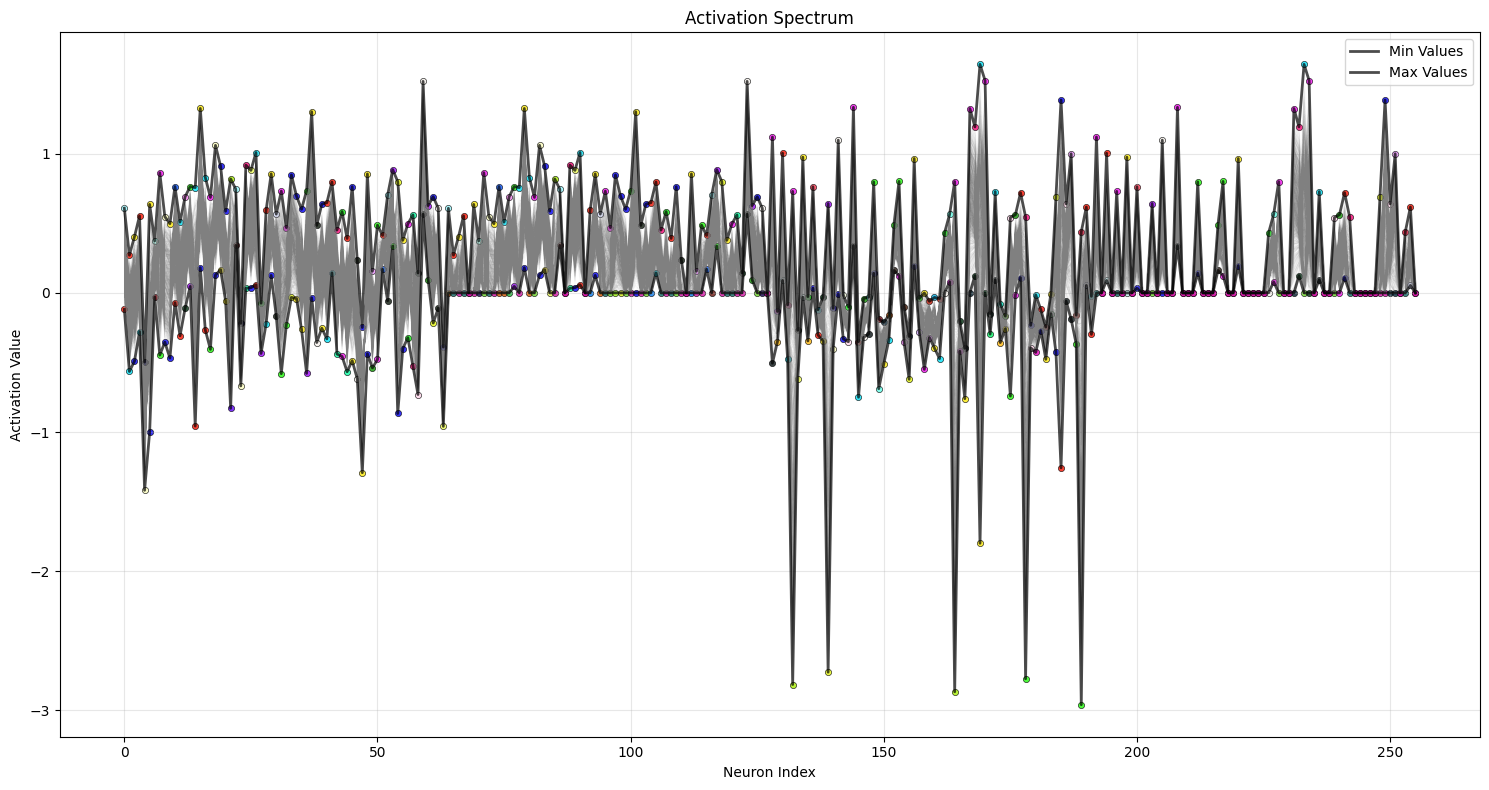

In [18]:
plot_activation_spectrum(inter_activations, inter_rgb, colored_spectrum=True, alpha=0.05, show_minmax=False )
plot_activation_spectrum(inter_activations, inter_rgb, colored_spectrum=False, alpha=0.05, show_minmax=True )